In [1]:
import glob
import pandas as pd

# Path to the folder containing the CSV files
folder_path = "TFO Data\PPG\Clean PPG"

# Get the list of CSV files in the folder
file_list = glob.glob(folder_path + "\*.csv")
# print(file_list)

In [2]:
# for file_path in file_list:
#     df = pd.read_csv(file_path)
#     num_channels = df.shape[1]
#     print(f"File: {file_path}, Number of Channels: {num_channels}")

In [3]:
# last_file_path = file_list[-1]
# last_df = pd.read_csv(last_file_path)
# channel_names = last_df.columns.tolist()
# print(channel_names)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

fileNum = random.randint(0, 3)
channelNum = 0

file_path = file_list[fileNum]


print(file_path)

# Read the CSV file into a pandas dataframe
df = pd.read_csv(file_path)
channel_names = df.columns.tolist()
channel = channel_names[channelNum]

# selected_column = df[channel]

# title = file_path.split("\\")[-1]
# print(f"Plot of {title}")

# Fs = 8000  # Sampling frequency

# # Generate the time array using np.linspace
# t = np.linspace(0, len(selected_column)/Fs, len(selected_column))

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# # Plot the time series
# axes[0].plot(t, selected_column)
# axes[0].set_title(channel)
# axes[0].set_xlabel('Time (s)')
# axes[0].set_ylabel('Amplitude')
# axes[0].set_xlim([t[0], t[-1]])

# # Plot the spectrogram
# axes[1].specgram(selected_column, Fs=Fs)
# axes[1].set_xlabel('Time')
# axes[1].set_ylabel('Frequency')
# axes[1].set_title(f'Spectrogram of {channel}')

# plt.tight_layout()
# plt.show()

TFO Data\PPG\Clean PPG\HR6.csv


In [5]:
# import pandas as pd

# for file_path in file_list:
#     df = pd.read_csv(file_path)
#     file_name = file_path.split("\\")[-1]
#     print(f"File: {file_name}, Length: {len(df)}")

#### Adding Noise

##### Spikes

Number of anomalies: 5
Anomaly indices: [228823, 229856, 180371, 145595, 171431]
Anomaly durations: [224 242 250 241 237]
Anomaly magnitudes: [ 3.36151081  3.29604737  7.18148362  8.76958171 11.25945687]


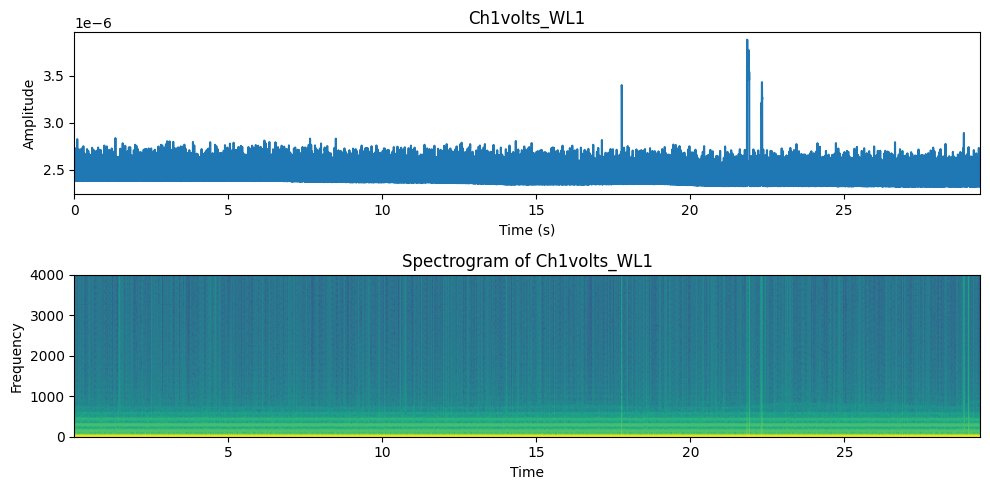

In [6]:
import random
import numpy as np

# Create a copy of the dataframe
df_copy = df.copy()

# determine number of anomalies
mean_num = 3
anomaly_num = int(np.ceil(np.random.exponential(mean_num)))
print("Number of anomalies:", anomaly_num)

# determine the indices of the anomalies
anomaly_indices = random.sample(range(len(df_copy)), anomaly_num)
print("Anomaly indices:", anomaly_indices)

# Create a new dataframe to store the starting indices of the anomalies for each channel
anomaly_start_indices_spike = pd.DataFrame(columns=df.columns, index=range(anomaly_num))

for i in range(len(anomaly_start_indices_spike)):
    for j in range(len(anomaly_start_indices_spike.columns)):
        start_index = anomaly_indices[i] + int(np.random.normal(0, len(df) * 0.01))
        if start_index < 0:
            start_index = 0
        anomaly_start_indices_spike.iloc[i, j] = start_index

# determine the durations of the anomalies
mean_dur = int(len(df_copy) * 0.001)
anomaly_durs = np.random.poisson(mean_dur, anomaly_num)
print("Anomaly durations:", anomaly_durs)

anomaly_end_indices_spike = anomaly_start_indices_spike.copy()

for i in range(len(anomaly_end_indices_spike)):
    for j in range(len(anomaly_end_indices_spike.columns)):
        end_index = anomaly_start_indices_spike.iloc[i, j] + anomaly_durs[i] + int(np.random.normal(0, len(df) * 0.001))
        if end_index >= len(df_copy):
            end_index = len(df_copy) - 1
        anomaly_end_indices_spike.iloc[i, j] = end_index

# determine the relative magnitude of the anomalies
mean_mag = 3
anomaly_mags = (np.random.exponential(mean_mag, anomaly_num) + 3)
print("Anomaly magnitudes:", anomaly_mags)

# standard deviations of each data column
stds = df.std()

# add the anomalies to the data
for i in range(anomaly_num):
    for col in df_copy.columns:
        start_index = anomaly_start_indices_spike.iloc[i][col]
        end_index = anomaly_end_indices_spike.iloc[i][col]
        df_copy.loc[start_index:end_index, col] += anomaly_mags[i] * stds[col] * (1 + np.random.normal(0, 0.05))

Fs = 8000  # Sampling frequency

selected_column = df_copy[channel]

# Generate the time array using np.linspace
t = np.linspace(0, len(selected_column)/Fs, len(selected_column))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the time series
axes[0].plot(t, selected_column)
axes[0].set_title(channel)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_xlim([t[0], t[-1]])

# Plot the spectrogram
axes[1].specgram(selected_column, Fs=Fs)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Spectrogram of {channel}')

plt.tight_layout()
plt.show()

##### DC Levels

In [7]:
import random
import numpy as np

# Create a copy of the dataframe
df_copy2 = df_copy.copy()

# # determine number of anomalies
# mean_num = 3
# anomaly_num = int(np.ceil(np.random.exponential(mean_num)))
# print("Number of anomalies:", anomaly_num)

# # determine the indices of the anomalies
# anomaly_indices = random.sample(range(len(df_copy2)), anomaly_num)
# print("Anomaly indices:", anomaly_indices)

# # determine the relative magnitude of the anomalies
# mean_mag = 3
# anomaly_mags = np.random.exponential(mean_mag, anomaly_num) * np.random.choice([-1, 1], anomaly_num)
# print("Anomaly magnitudes:", anomaly_mags)

# # Create a new dataframe for anomalies
# anomaly_data_shifts = pd.DataFrame({'Anomaly Indices': anomaly_indices, 'Anomaly Magnitudes': anomaly_mags})

# # add the anomalies to the data
# for i in range(anomaly_num):
#     offset1 = int(np.random.normal(0, len(df) * 0.01))
#     start_index = anomaly_indices[i] + offset1
#     if start_index < 0:
#         start_index = 0
#     for col in df_copy2.columns:
#         df_copy2.loc[start_index:len(df_copy2) - 1, col] += anomaly_mags[i] * stds[col] * (1 + np.random.normal(0, 0.05))

# Fs = 8000  # Sampling frequency

# selected_column = df_copy2[channel]

# # Generate the time array using np.linspace
# t = np.linspace(0, len(selected_column)/Fs, len(selected_column))

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# # Plot the time series
# axes[0].plot(t, selected_column)
# axes[0].set_title(channel)
# axes[0].set_xlabel('Time (s)')
# axes[0].set_ylabel('Amplitude')
# axes[0].set_xlim([0, t[-1]])

# # Plot the spectrogram
# axes[1].specgram(selected_column, Fs=Fs)
# axes[1].set_xlabel('Time')
# axes[1].set_ylabel('Frequency')
# axes[1].set_title(f'Spectrogram of {channel}')

# plt.tight_layout()
# plt.show()

#### Display

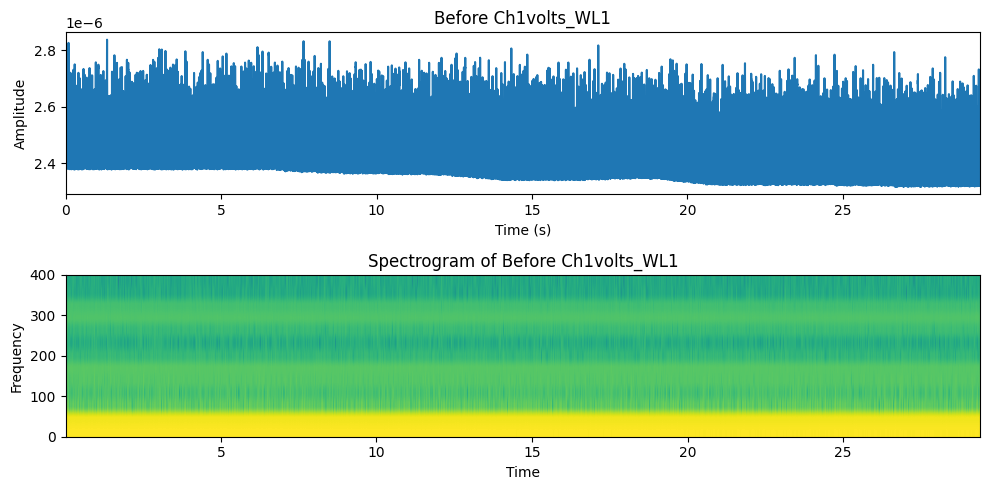

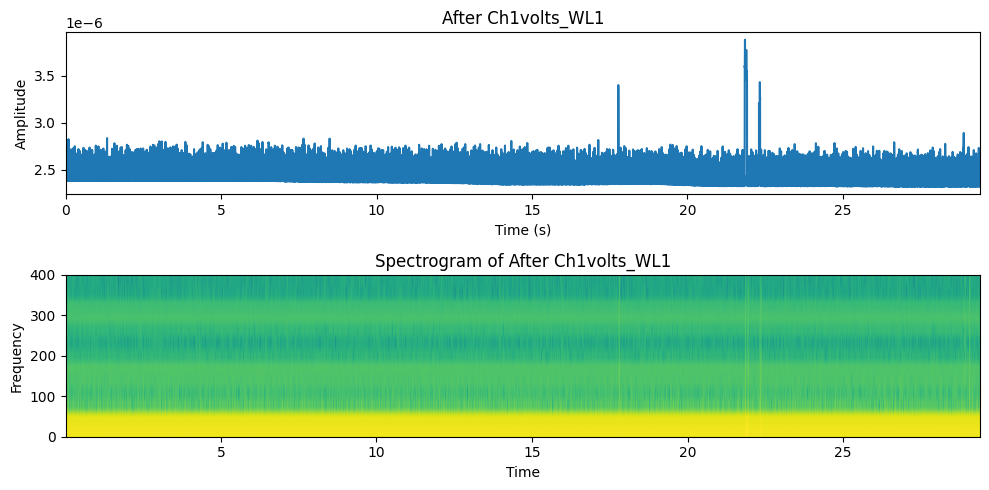

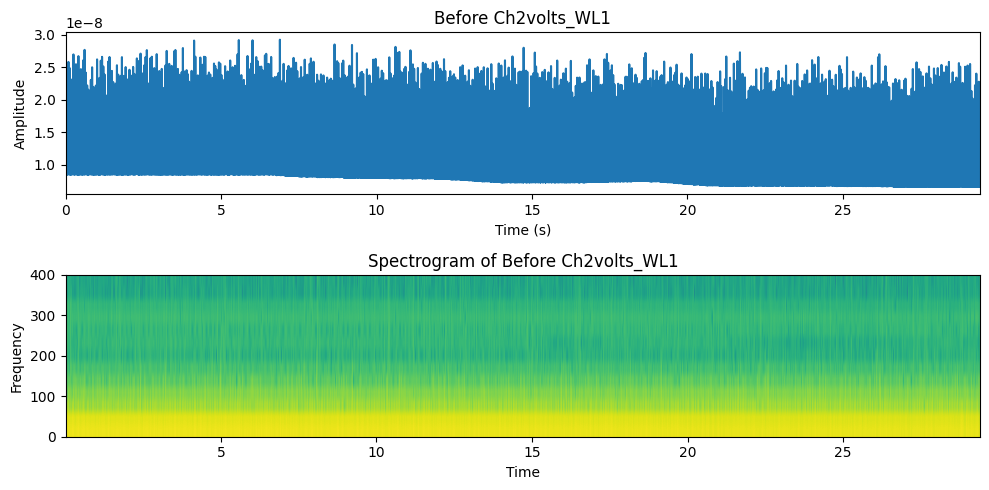

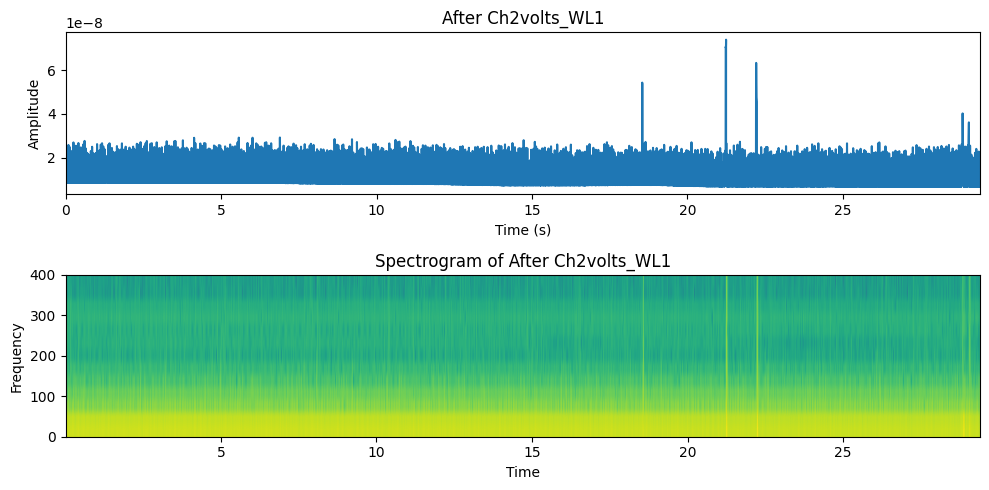

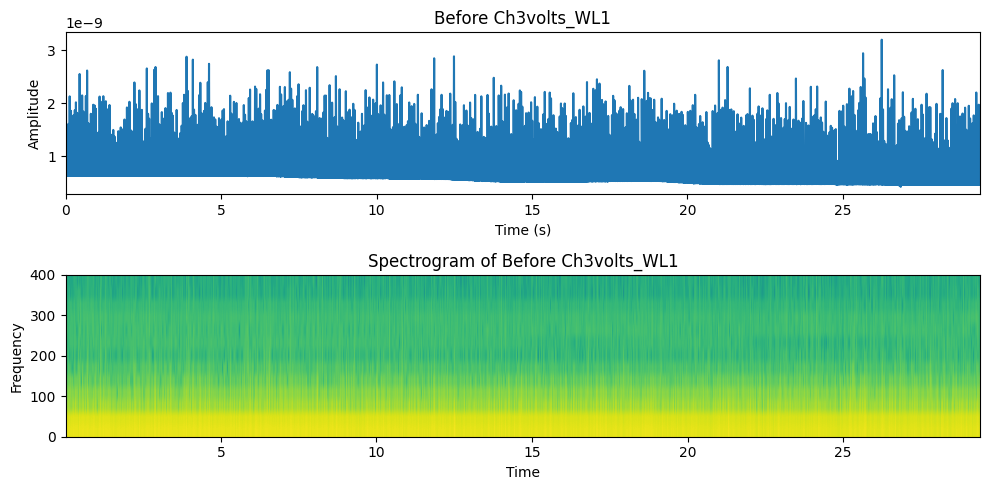

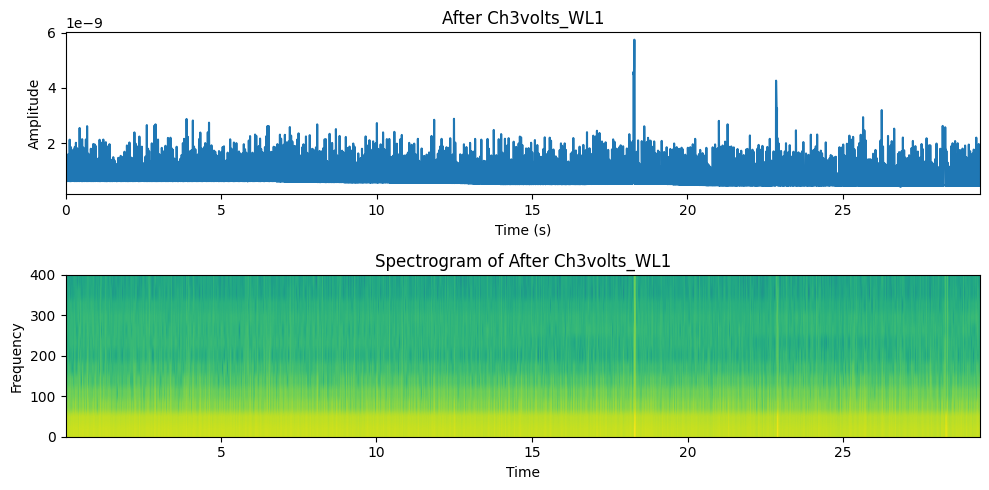

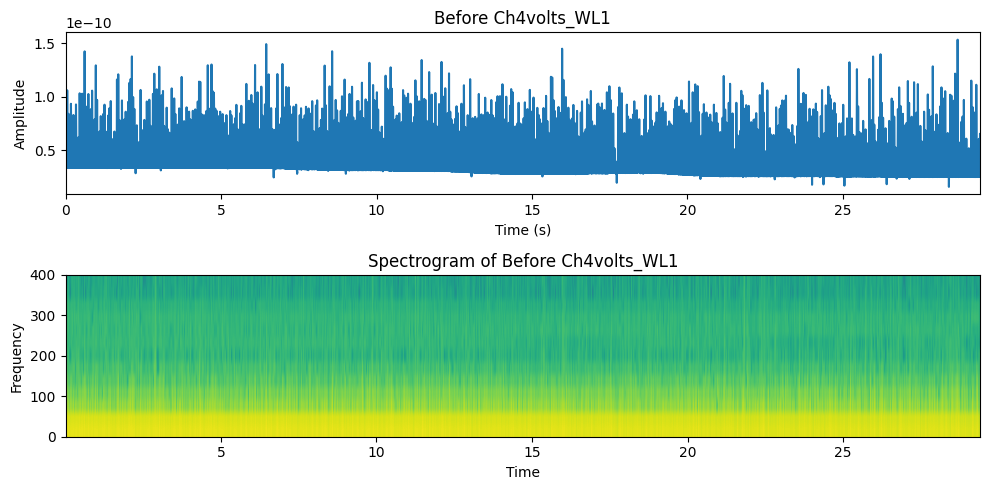

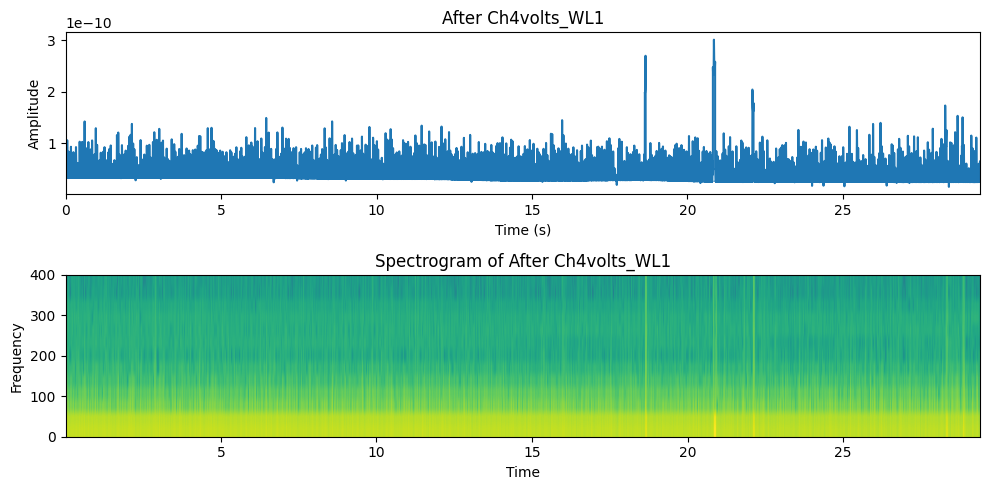

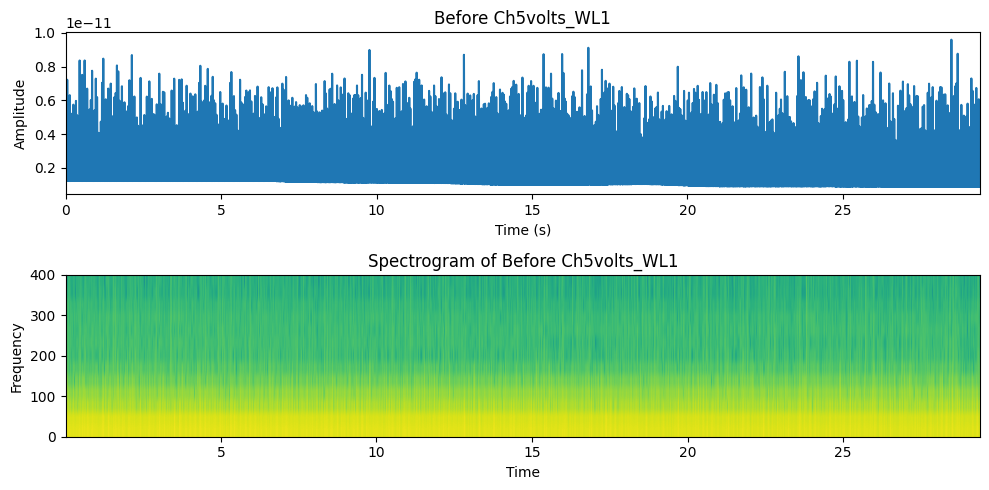

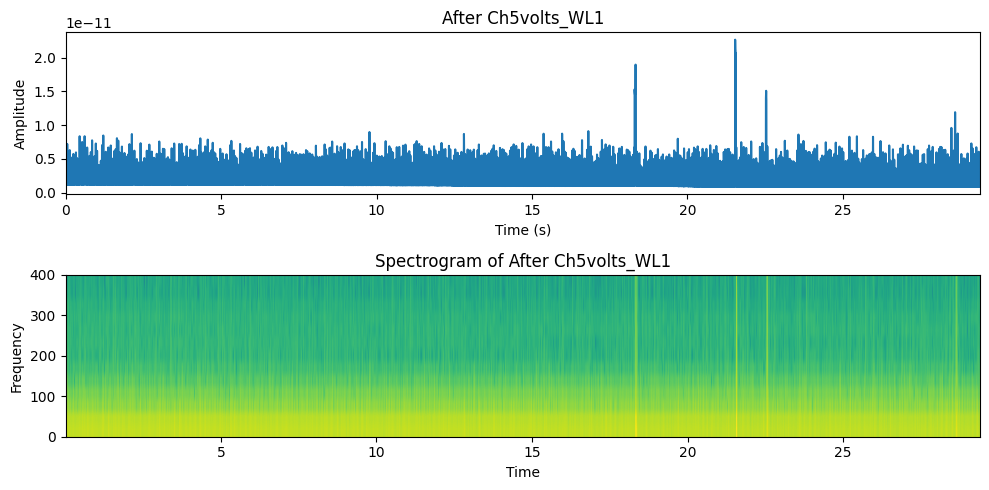

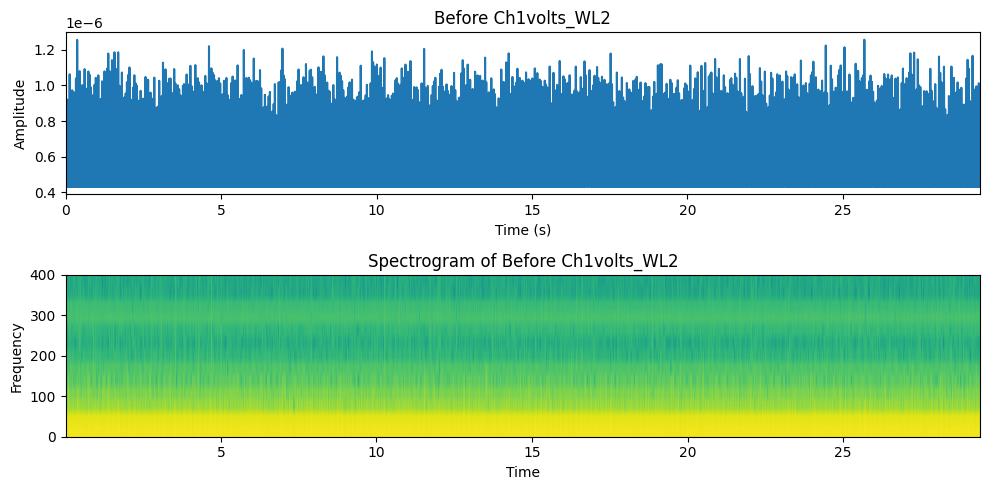

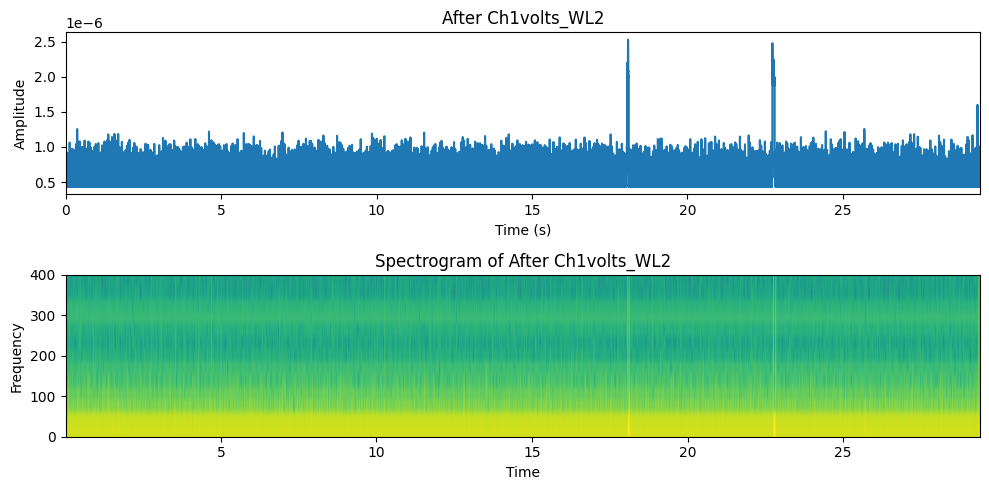

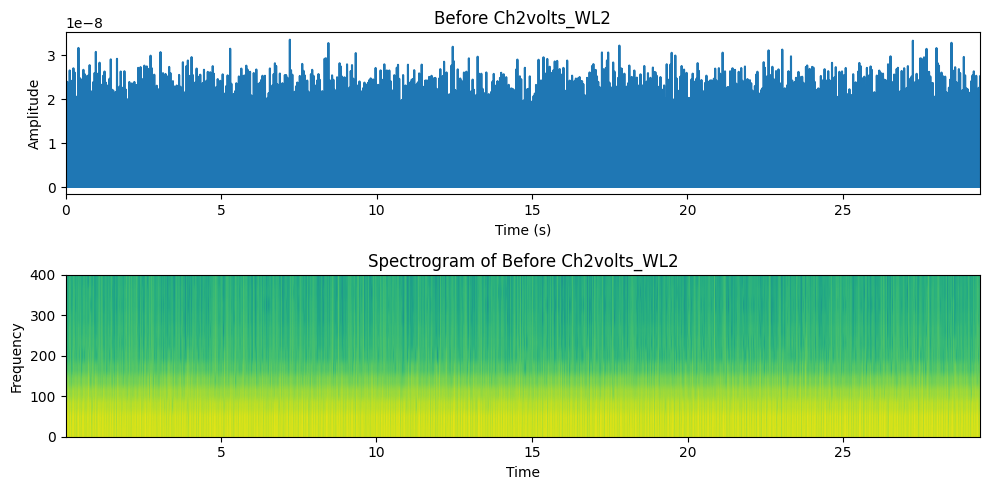

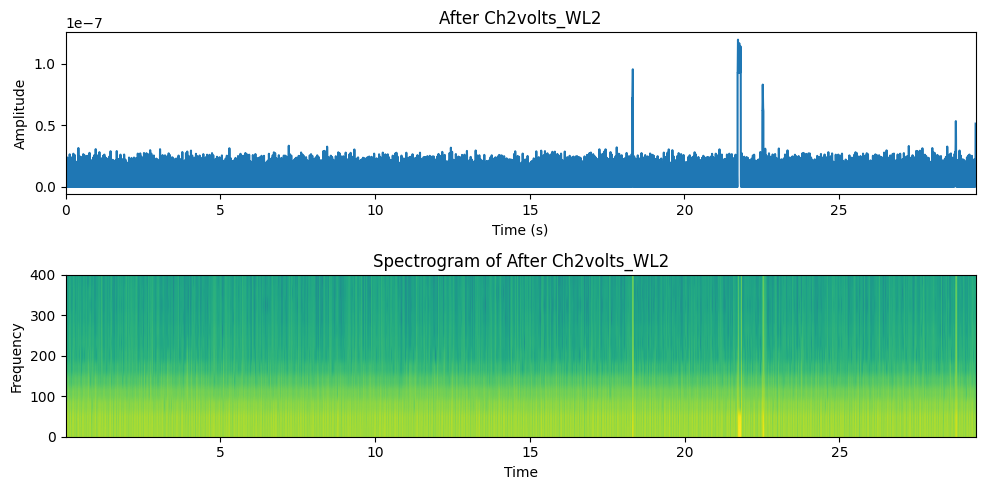

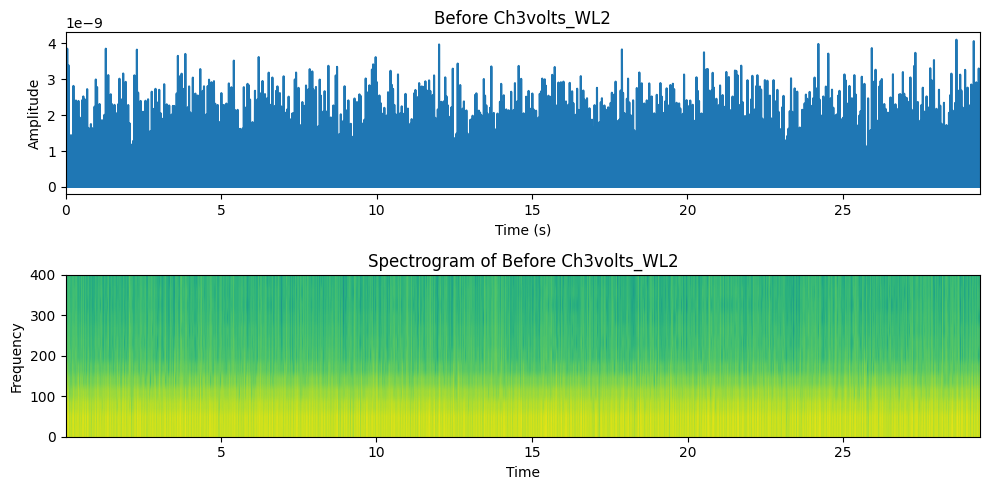

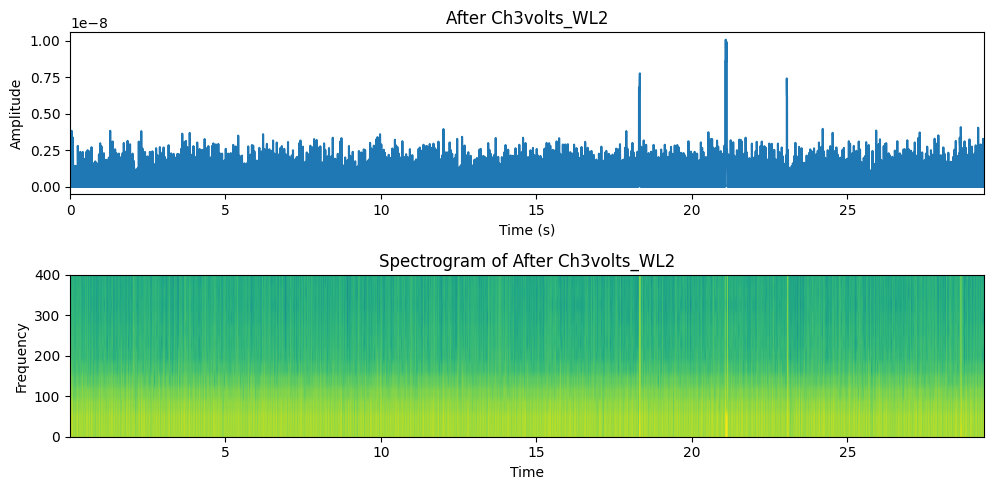

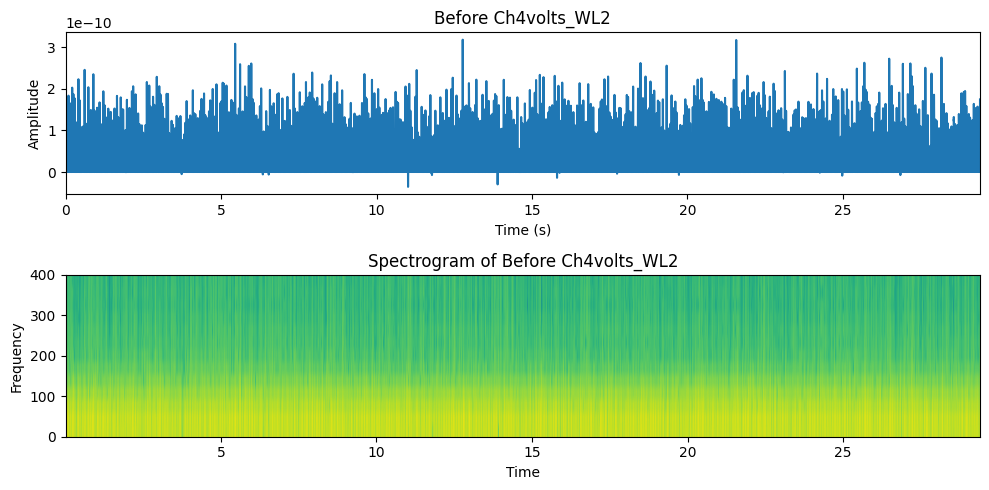

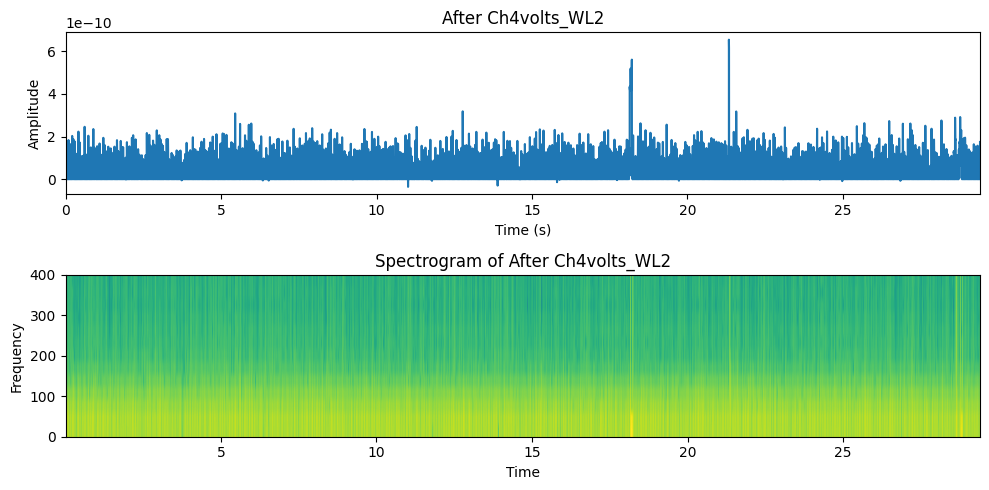

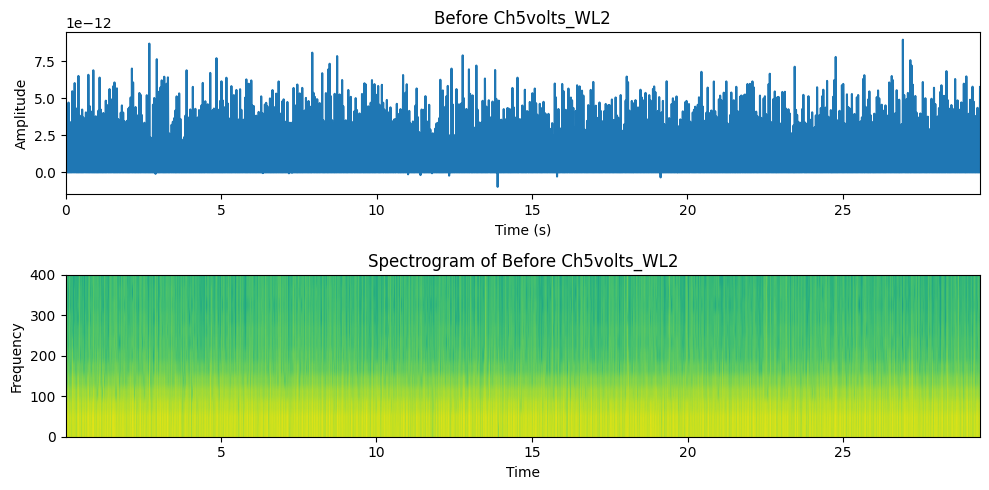

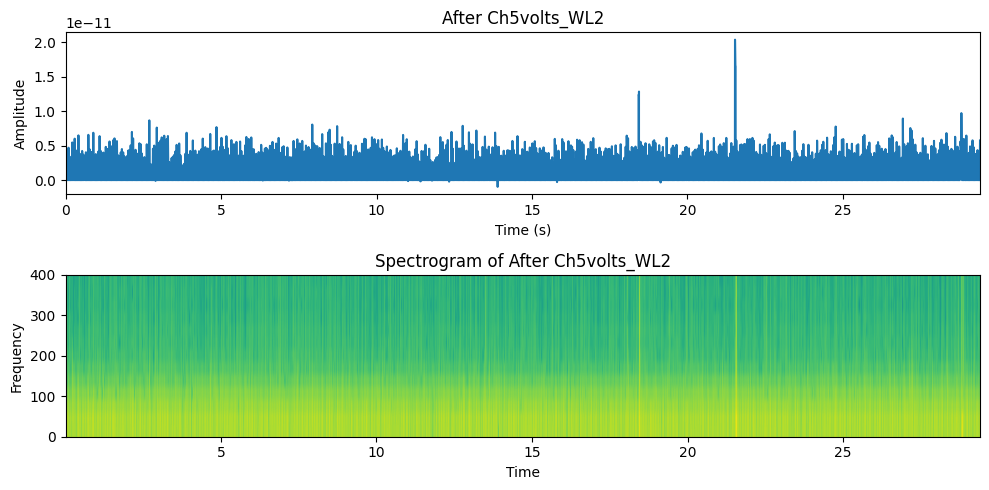

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the spectrogram
def plot_spectrogram(data, title):
    Fs = 8000  # Sampling frequency

    # Generate the time array using np.linspace
    t = np.linspace(0, len(data)/Fs, len(data))

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

    # Plot the time series
    axes[0].plot(t, data)
    axes[0].set_title(title)
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude')
    axes[0].set_xlim([0, t[-1]])

    # Plot the spectrogram
    axes[1].specgram(data, Fs=Fs)
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Spectrogram of {title}')
    axes[1].set_ylim([0, 400])  # Limit the y-axis to 0-400 Hz
    

    plt.tight_layout()
    plt.show()

# Plot the before and after spectrograms for each column
for col in df.columns:
    # Before spectrogram
    plot_spectrogram(df[col], f'Before {col}')

    # After spectrogram
    plot_spectrogram(df_copy2[col], f'After {col}')

In [9]:
import numpy as np

# Create a new dataframe with the same size as df_copy2
anomaly_indices_save = pd.DataFrame(False, index=df_copy2.index, columns=df_copy2.columns)

# Iterate over the columns in anomaly_start_indices_spike and anomaly_end_indices_spike
for col in anomaly_start_indices_spike.columns:
    # Get the start and end indices for the current column
    start_indices = anomaly_start_indices_spike[col]
    end_indices = anomaly_end_indices_spike[col]
    
    # Iterate over the rows in anomaly_start_indices_spike and anomaly_end_indices_spike
    for i in range(len(start_indices)):
        # Get the start and end indices for the current row
        start_index = start_indices[i]
        end_index = end_indices[i]
        
        # Set the values between the start and end indices to True in the new dataframe
        anomaly_indices_save.loc[start_index:end_index, col] = True

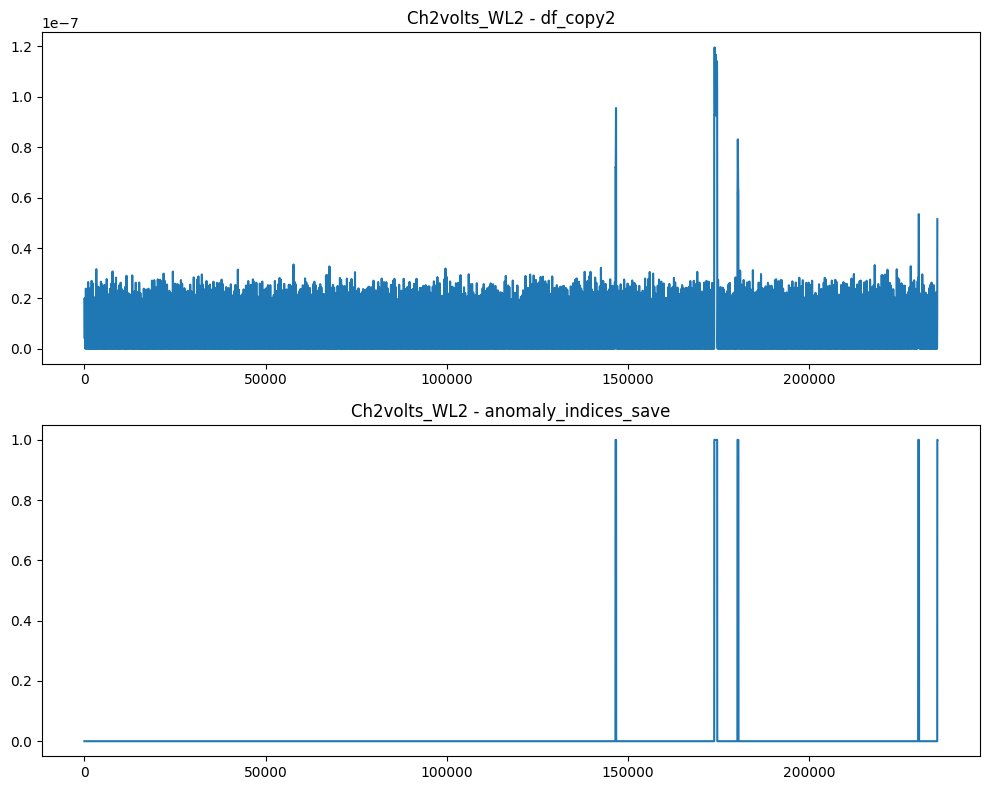

In [10]:
import matplotlib.pyplot as plt

# Set the channel name
channel_name = 'Ch2volts_WL2'

# Get the data for the specified channel from df_copy2 and anomaly_indices_save
df_copy2_channel = df_copy2[channel_name]
anomaly_indices_save_channel = anomaly_indices_save[channel_name]

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot the channel from df_copy2 in the first subplot
axs[0].plot(df_copy2_channel)
axs[0].set_title(f'{channel_name} - df_copy2')

# Plot the channel from anomaly_indices_save in the second subplot
axs[1].plot(anomaly_indices_save_channel)
axs[1].set_title(f'{channel_name} - anomaly_indices_save')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

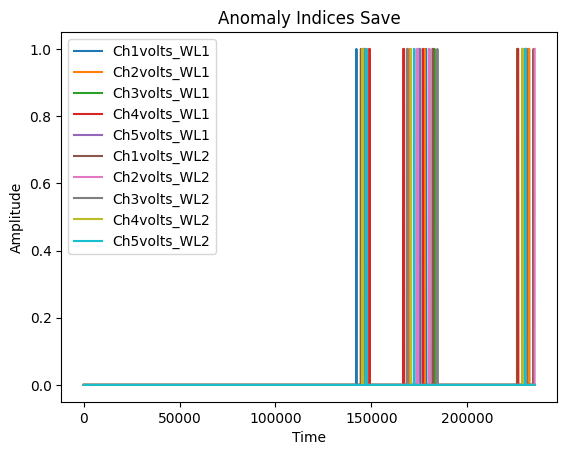

In [11]:
# Convert the data in anomaly_indices_save to numeric
anomaly_indices_save_numeric = anomaly_indices_save.astype(int)

# Plot the numeric data
anomaly_indices_save_numeric.plot(ax=plt.gca())

# Set the title and labels
plt.title('Anomaly Indices Save')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Show the plot
plt.show()

In [12]:
import os
import random
import string

# Get the original file name
original_file_name = file_path.split("\\")[-1]

# Remove the .csv extension from the file name
original_file_name = original_file_name.replace(".csv", "")

# Generate a unique identifier
unique_identifier = ''.join(random.choices(string.ascii_letters + string.digits, k=5))

# Create the new file name
new_file_name = f"{original_file_name}_{unique_identifier}.csv"

# Define the path to save the new file
save_path = os.path.join("TFO Data", "PPG", "Artificial Anomalies", "datafiles", new_file_name)

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the copy_df DataFrame to the new file
df_copy2.to_csv(save_path, index=False)

# Create the new file name for spike anomalies
spike_anomaly_file_name = f"indices_{original_file_name}_{unique_identifier}.csv"

# Save the spike dataframe to the spike filename
# Create the directory if it doesn't exist
spike_anomaly_file_path = os.path.join("TFO Data", "PPG", "Artificial Anomalies","anomaly indices", spike_anomaly_file_name)
os.makedirs(os.path.dirname(spike_anomaly_file_path), exist_ok=True)
anomaly_indices_save.to_csv(spike_anomaly_file_path, index=False)
